# CS5242

## Load Data

In [1]:
from data import Data

train_data = Data(data_type='train')
test_data = Data(data_type='test')

print("Train data: x:"+ str(train_data.x.shape)+ ' y:'+str(train_data.y.shape))
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(18662, 1000, 102) y:(18662, 1)
Test data: x:(6051, 1000, 102) y:(6051, 1)


## Model

In [2]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

## Save Checkpoint

In [7]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [9]:
history = model.fit(x=train_data.x, y=train_data.y, validation_split=0.1, epochs=30, callbacks=[checkpoint_callback], verbose=2)

Train on 16795 samples, validate on 1867 samples
Epoch 1/30
16795/16795 - 43s - loss: 0.2706 - accuracy: 0.8856 - val_loss: 0.2611 - val_accuracy: 0.8956
Epoch 2/30
16795/16795 - 41s - loss: 0.1955 - accuracy: 0.9172 - val_loss: 0.2359 - val_accuracy: 0.9009
Epoch 3/30
16795/16795 - 41s - loss: 0.1634 - accuracy: 0.9352 - val_loss: 0.2379 - val_accuracy: 0.9116
Epoch 4/30
16795/16795 - 41s - loss: 0.1435 - accuracy: 0.9444 - val_loss: 0.1942 - val_accuracy: 0.9272
Epoch 5/30
16795/16795 - 41s - loss: 0.1301 - accuracy: 0.9495 - val_loss: 0.1968 - val_accuracy: 0.9298
Epoch 6/30
16795/16795 - 41s - loss: 0.1159 - accuracy: 0.9542 - val_loss: 0.1841 - val_accuracy: 0.9341
Epoch 7/30
16795/16795 - 41s - loss: 0.1043 - accuracy: 0.9588 - val_loss: 0.1778 - val_accuracy: 0.9368
Epoch 8/30
16795/16795 - 41s - loss: 0.0976 - accuracy: 0.9623 - val_loss: 0.1865 - val_accuracy: 0.9330
Epoch 9/30
16795/16795 - 41s - loss: 0.1095 - accuracy: 0.9583 - val_loss: 0.2474 - val_accuracy: 0.9100
Epoch 

## Plot Training History

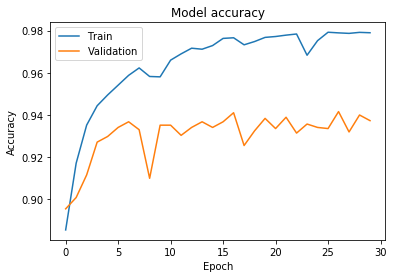

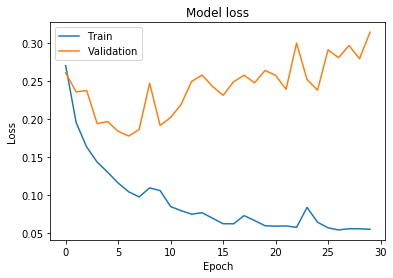

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Summary

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection multiple                  236544    
_________________________________________________________________
dense_4 (Dense)              multiple                  16448     
_________________________________________________________________
dense_5 (Dense)              multiple                  65        
Total params: 253,057
Trainable params: 253,057
Non-trainable params: 0
_________________________________________________________________


## Restore Weights

In [3]:
checkpoint_dir = './training_checkpoints'
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

In [4]:
test_predict = model.predict(test_data.x)

In [5]:
print(test_predict.shape)

(6051, 1)


## Save Prediction to CSV

In [5]:
import csv

output_file = 'result.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(test_predict):
        csv_writer.writerow((id, predict[0]))